# China soundings from Henan flood 7-20 to 7-21, 2021

In [68]:
import scipy.io as sp # for Matlab reading
import numpy as np
import matplotlib.pyplot as plt
import metpy
import metpy.calc as mpcalc

In [7]:
!ls /Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data

up_2021071700.mat up_2021071812.mat up_2021072000.mat up_2021072112.mat
up_2021071712.mat up_2021071900.mat up_2021072012.mat up_2021072200.mat
up_2021071800.mat up_2021071912.mat up_2021072100.mat up_2021072212.mat


In [15]:
mat = sp.loadmat("/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071700.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Heigh_Alti', 'Heigh_WIN_D', 'Heigh_WIN_S', 'PRS_DPT', 'PRS_HWC', 'PRS_TEM', 'PRS_WIN_D', 'PRS_WIN_S'])

In [98]:
# Extract troposphere 0:-80
Td = mat.get('PRS_DPT')[0:,0] *metpy.units.units('degC')
T = mat.get('PRS_TEM')[0:,0] *metpy.units.units('degC')
p = mat.get('PRS_HWC')[0:,0] *metpy.units.units('hPa')

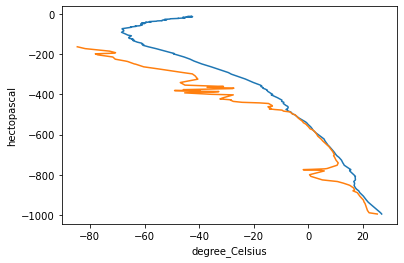

In [70]:
plt.plot(T,-p); plt.plot(Td,-p)

/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071700.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071712.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071800.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071812.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071900.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021071912.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072000.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072012.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072100.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072112.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072200.mat
/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/up_2021072212.mat


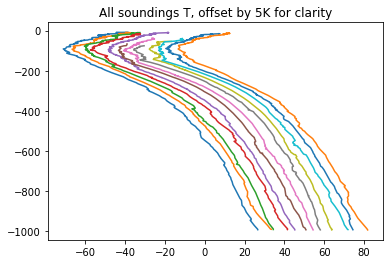

In [101]:
import glob

for i,file in enumerate(glob.glob('/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/*.mat')): 
    print(file)
    mat = sp.loadmat(file)
    Td=mat.get('PRS_DPT')[0:,0]# *metpy.units.units('degC'))
    T =mat.get('PRS_TEM')[0:,0]# *metpy.units.units('degC'))
    p =mat.get('PRS_HWC')[0:,0]# *metpy.units.units('hPa'))
    plt.plot(T+i*5,-p); #plt.plot(Td,-p)
    plt.title('All soundings T, offset by 5K for clarity')

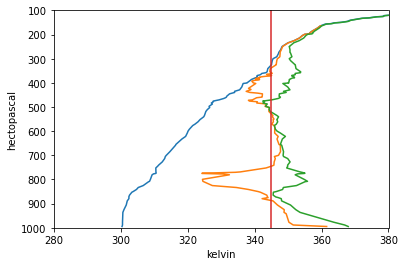

In [85]:
th = mpcalc.potential_temperature(p,T)
the =  mpcalc.equivalent_potential_temperature(p,T,Td)
thesat=mpcalc.equivalent_potential_temperature(p,T,T) # saturation value

plt.plot(th,p); plt.plot(the,p); plt.plot(thesat,p); plt.xlim([280,380]); plt.ylim([1000,100])
plt.plot([345,345],[1000,100])

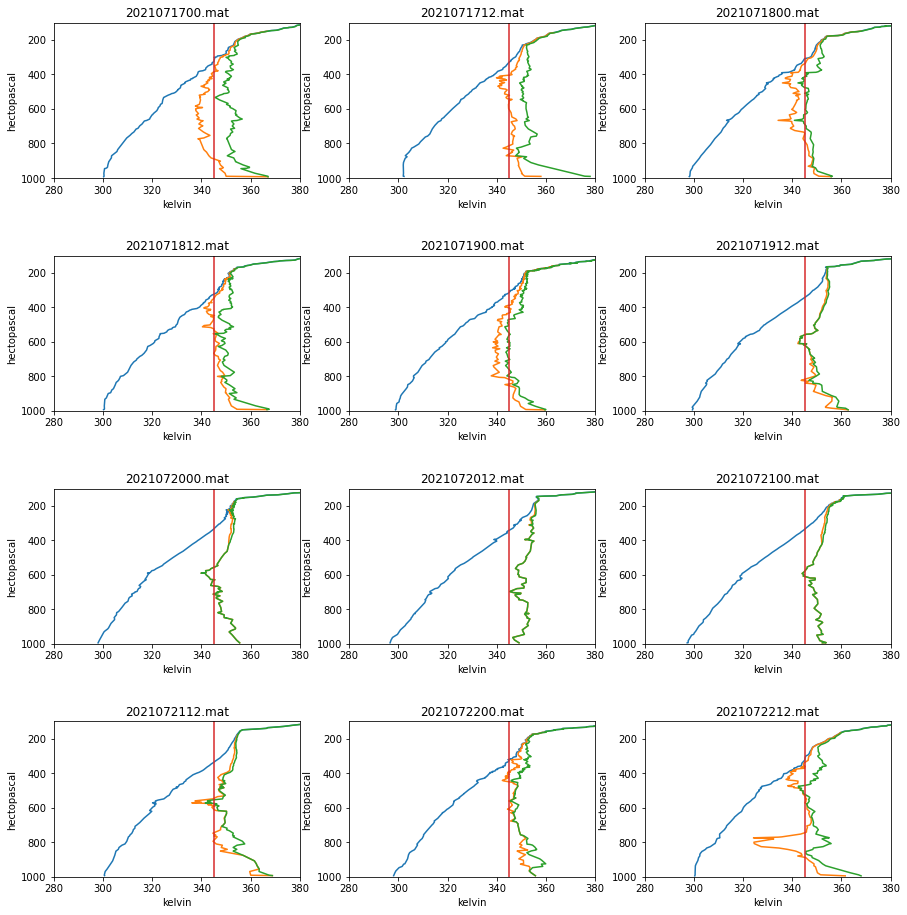

In [102]:
# Loop over them all

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

for i,file in enumerate(glob.glob('/Users/brianmapes/Box/Henan_flood/sounding_Zhengzhou_city/data/*.mat')): 
    #print(file)
    
    mat = sp.loadmat(file)
    Td=mat.get('PRS_DPT')[0:,0]*metpy.units.units('degC')
    T =mat.get('PRS_TEM')[0:,0]*metpy.units.units('degC')
    p =mat.get('PRS_HWC')[0:,0]*metpy.units.units('hPa')
    th = mpcalc.potential_temperature(p,T)
    the =  mpcalc.equivalent_potential_temperature(p,T,Td)
    thesat=mpcalc.equivalent_potential_temperature(p,T,T) # saturation value

    ax = plt.subplot(5, 3, i+1) # 6x2 array, filled in order
    plt.plot(th,p); plt.plot(the,p); plt.plot(thesat,p); plt.xlim([280,380]); plt.ylim([1000,100])
    plt.plot([345,345],[1000,100])    
    plt.title(file[66:])

In [45]:
help(metpy)

Help on package metpy:

NAME
    metpy - Tools for reading, calculating, and plotting with weather data.

PACKAGE CONTENTS
    _vendor (package)
    _version
    calc (package)
    cbook
    constants (package)
    deprecation
    future
    interpolate (package)
    io (package)
    package_tools
    pandas
    plots (package)
    testing
    units
    xarray

VERSION
    1.2.0

FILE
    /Users/brianmapes/opt/miniconda3/envs/MPO624/lib/python3.8/site-packages/metpy/__init__.py


